In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv('Extended_Employee_Performance_and_Productivity_Data.csv')
df.head()

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

In [5]:
df.isnull().sum()

Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64

In [6]:
missing = df.isnull().sum()
missing_prc = (missing / len(df)) * 100
print(missing_prc[missing_prc > 0])

# Duplicates
print(f"Duplicates: {df.duplicated().sum()}")

# Target distribution
print(df['Performance_Score'].value_counts())

Series([], dtype: float64)
Duplicates: 0
Performance_Score
1    20120
2    20013
3    19999
4    19940
5    19928
Name: count, dtype: int64


/tmp/ipykernel_31213/2004741952.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


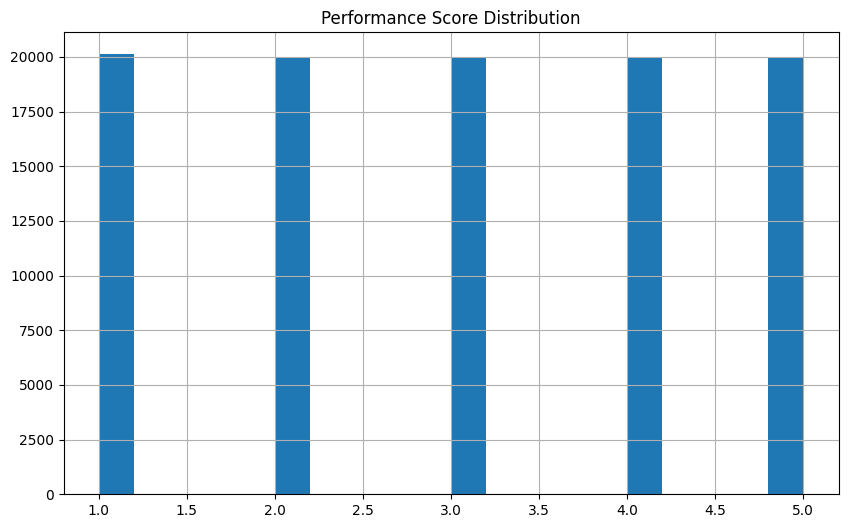

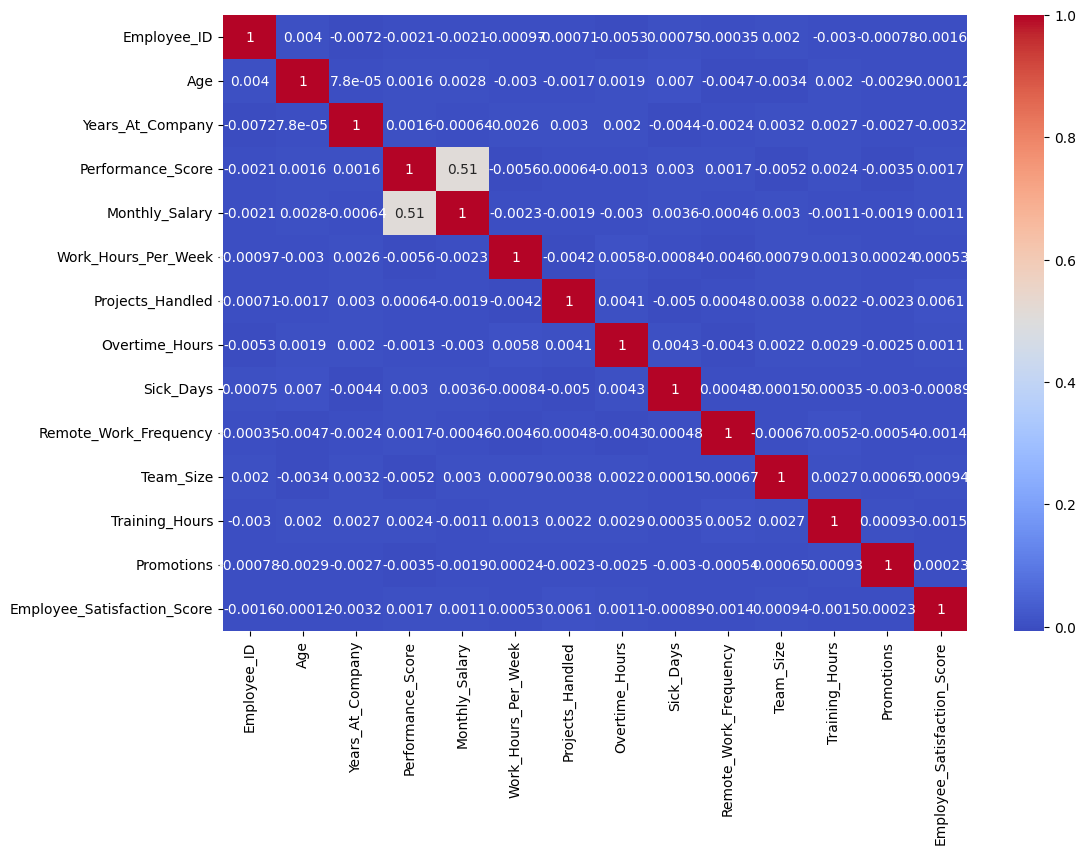

<Figure size 640x480 with 0 Axes>

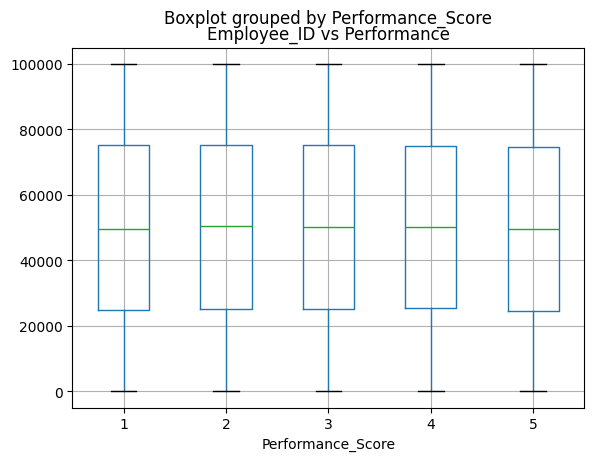

<Figure size 640x480 with 0 Axes>

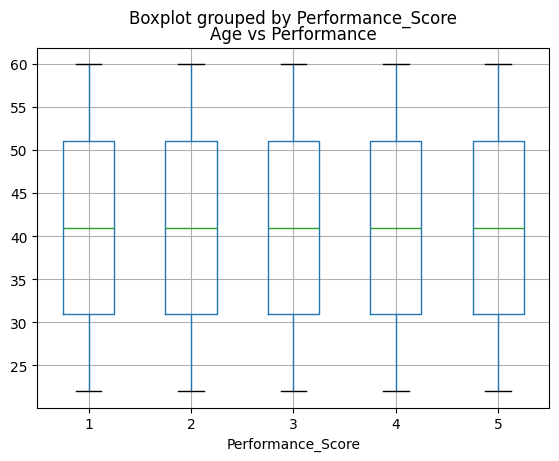

<Figure size 640x480 with 0 Axes>

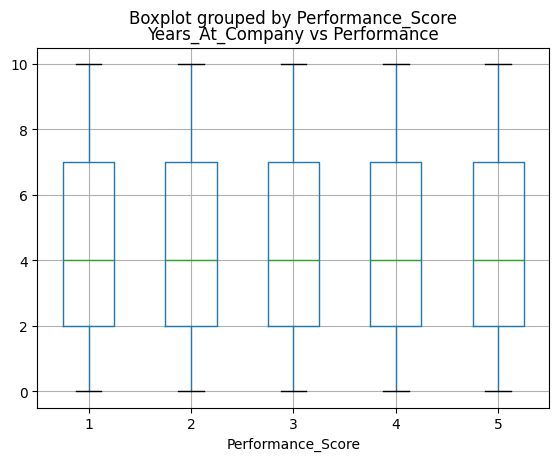

<Figure size 640x480 with 0 Axes>

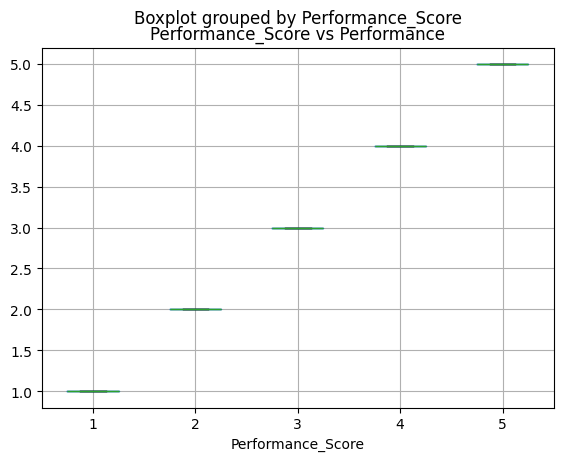

<Figure size 640x480 with 0 Axes>

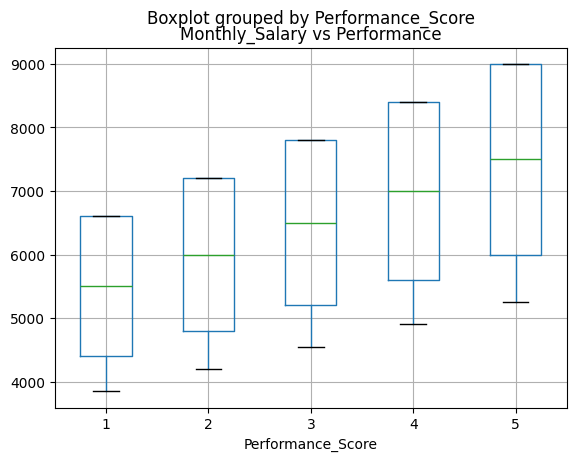

<Figure size 640x480 with 0 Axes>

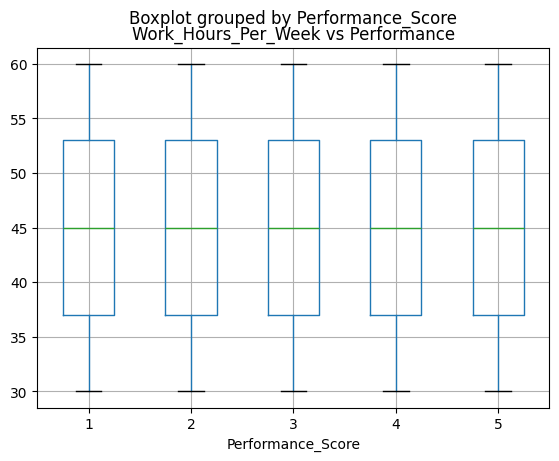

<Figure size 640x480 with 0 Axes>

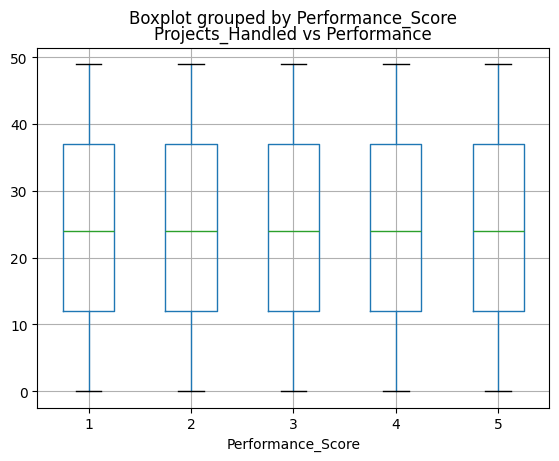

<Figure size 640x480 with 0 Axes>

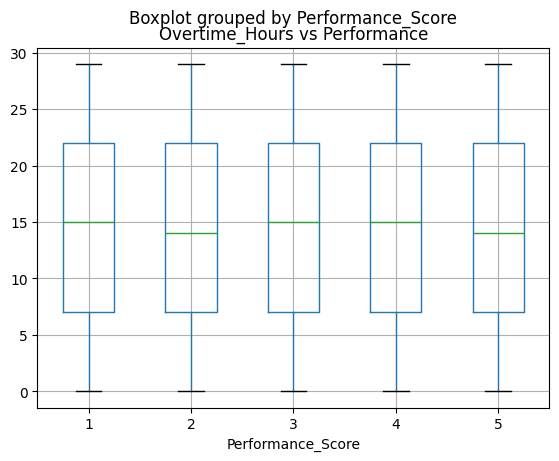

<Figure size 640x480 with 0 Axes>

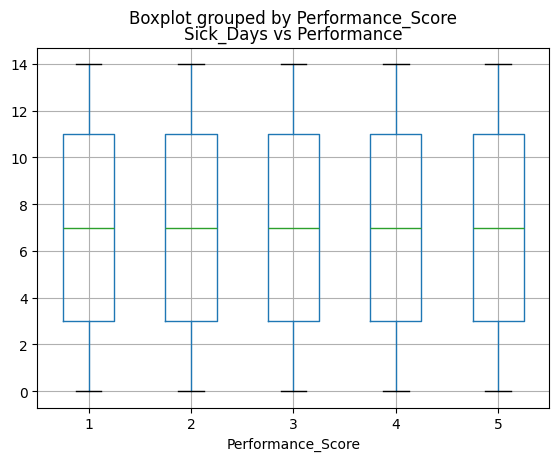

<Figure size 640x480 with 0 Axes>

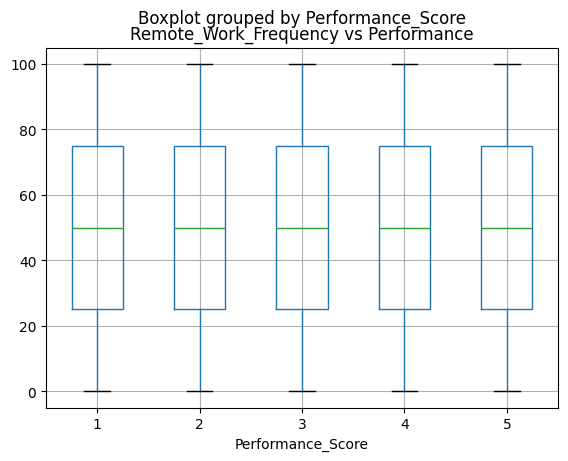

<Figure size 640x480 with 0 Axes>

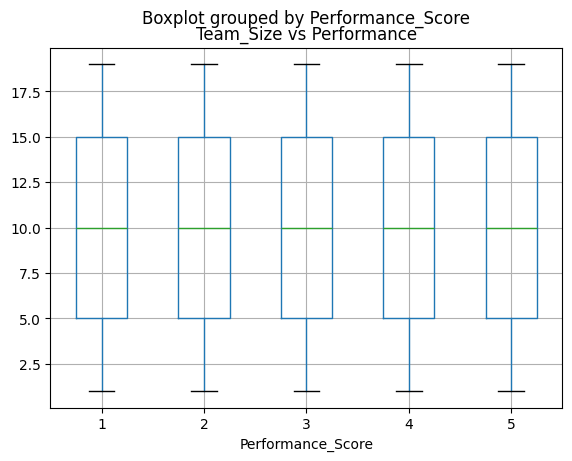

<Figure size 640x480 with 0 Axes>

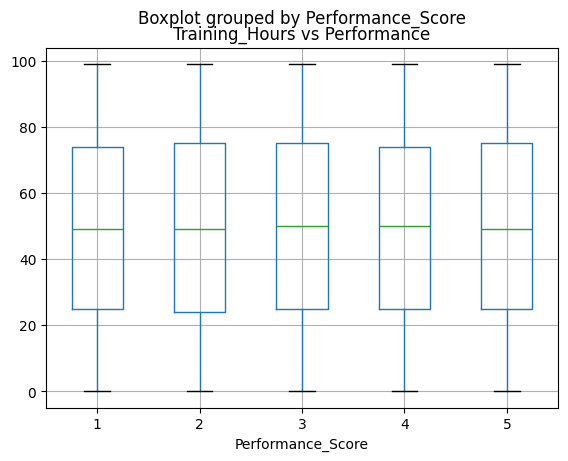

<Figure size 640x480 with 0 Axes>

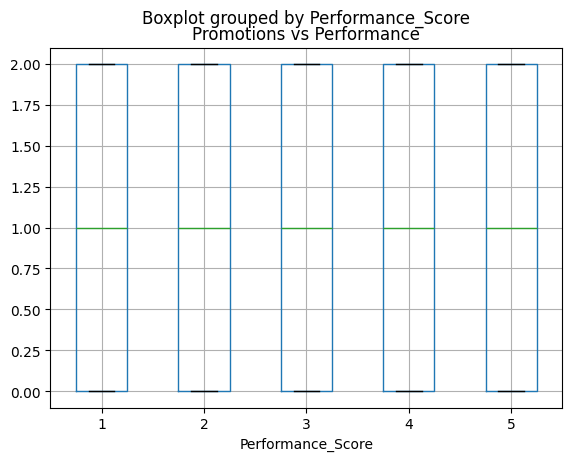

<Figure size 640x480 with 0 Axes>

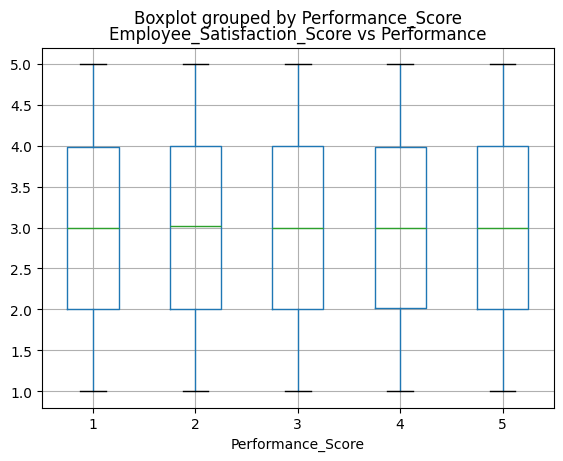

In [7]:
# Target distribution
plt.figure(figsize=(10, 6))
df['Performance_Score'].hist(bins=20)
plt.title('Performance Score Distribution')

# Correlation heatmap
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')

# Feature vs Target
for col in numeric_cols:
    plt.figure()
    df.boxplot(column=col, by='Performance_Score')
    plt.title(f'{col} vs Performance')

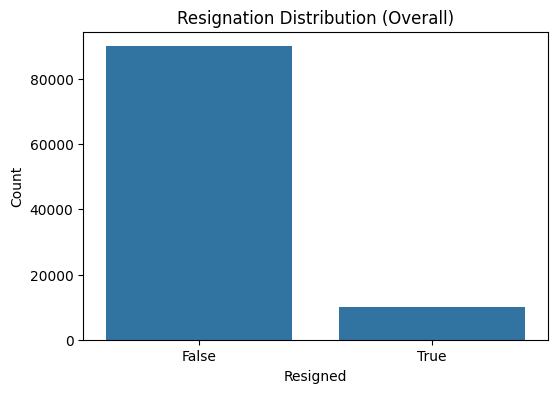

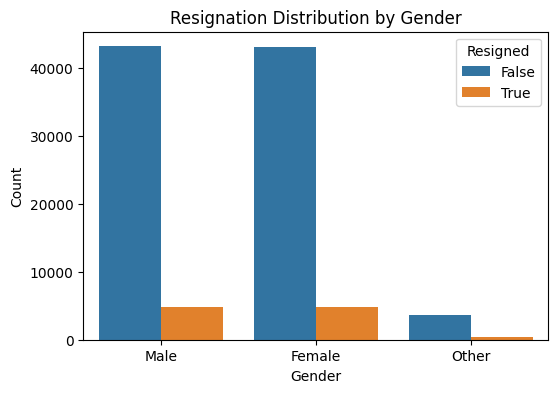

In [8]:
# Overall distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Resigned")
plt.title("Resignation Distribution (Overall)")
plt.xlabel("Resigned")
plt.ylabel("Count")
plt.show()

# Distribution by Gender
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Gender", hue="Resigned")
plt.title("Resignation Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()



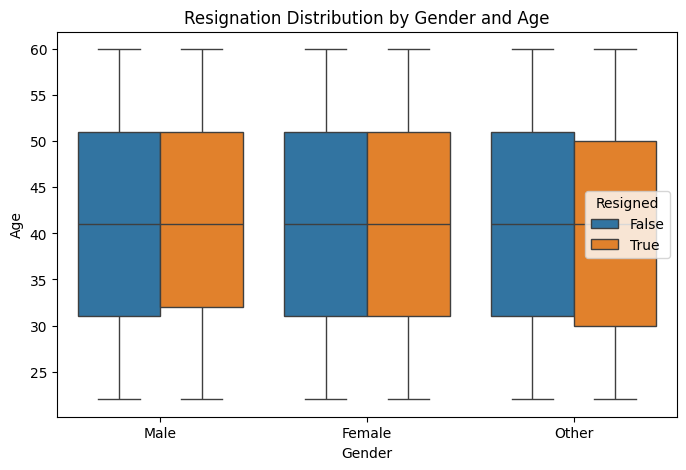

In [9]:


plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Gender", y="Age", hue="Resigned")
plt.title("Resignation Distribution by Gender and Age")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()



In [10]:
def categorical_attrition_analysis(df, target="Resigned", cat_cols=None):
    
    if cat_cols is None:
        cat_cols = ["Gender", "Department", "Job_Title"]
    
    results = {}
    
    for col in cat_cols:
        if col in df.columns:
            rates = (
                df.groupby(col)[target]
                .mean()
                .reset_index()
                .rename(columns={target: "Attrition_Rate"})
                .sort_values("Attrition_Rate", ascending=False)
            )
            results[col] = rates
    
    return results

attrition_results = categorical_attrition_analysis(df)

for col, res in attrition_results.items():
    print(f"\nAttrition rate by {col}:")
    print(res)


Attrition rate by Gender:
   Gender  Attrition_Rate
0  Female        0.100331
1    Male        0.100081
2   Other        0.097530

Attrition rate by Department:
         Department  Attrition_Rate
2           Finance        0.105357
3                HR        0.102646
5             Legal        0.102177
6         Marketing        0.100303
7        Operations        0.100259
8             Sales        0.099263
0  Customer Support        0.098777
1       Engineering        0.096477
4                IT        0.095589

Attrition rate by Job_Title:
    Job_Title  Attrition_Rate
4     Manager        0.102618
0     Analyst        0.101676
1  Consultant        0.100633
6  Technician        0.100035
2   Developer        0.099401
5  Specialist        0.098366
3    Engineer        0.097981


In [11]:
from datetime import datetime
def add_joined_tenure(df, hire_col="Hire_Date"):
    
    
    # Ensure Hire_Date is datetime
    df[hire_col] = pd.to_datetime(df[hire_col], errors="coerce")
    
    # Extract Year_Joined
    df["Year_Joined"] = df[hire_col].dt.year
    
    # Compute Tenure (current year - year joined)
    current_year = datetime.now().year
    df["Tenure"] = current_year - df["Year_Joined"]
    
    return df

df = add_joined_tenure(df)

print("done")

done


In [12]:
def add_hr_features(df):

    df["Workload_Ratio"] = np.where(
        df["Work_Hours_Per_Week"] > 0,
        df["Overtime_Hours"] / df["Work_Hours_Per_Week"],
        0
    )

    # Promotion rate
    df["Promotion_Rate"] = np.where(
        df["Years_At_Company"] > 0,
        df["Promotions"] / df["Years_At_Company"],
        0
    )
    
    # Project load
    df["Project_Load"] = np.where(
        df["Team_Size"] > 0,
        df["Projects_Handled"] / df["Team_Size"],
        0
    )

    return df
df = add_hr_features(df)
print(df[["Workload_Ratio", "Promotion_Rate", "Project_Load"]].head())

   Workload_Ratio  Promotion_Rate  Project_Load
0        0.666667        0.000000      2.285714
1        0.382353        0.000000      2.833333
2        0.162162        0.000000      2.700000
3        0.538462        0.142857      1.000000
4        0.763158        0.333333      0.733333


In [13]:
def create_interaction_features(df):
    
    # Ensure required columns exist
    required_cols = ["Employee_Satisfaction_Score", "Workload_Ratio", "Tenure", "Promotions",
                     "Job_Title", "Department"]
    
    missing_cols = [col for col in required_cols if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Missing columns for interaction features: {missing_cols}")

    # Numerical interactions
    df["Satisfaction_Workload"] = df["Employee_Satisfaction_Score"] * df["Workload_Ratio"]
    df["NoPromotion_LongTenure"] = df["Tenure"] * (df["Promotions"] == 0).astype(int)
    
    # Categorical interactions
    df["Job_Department"] = df["Job_Title"].astype(str) + "_" + df["Department"].astype(str)
    
    return df

df = create_interaction_features(df)

print(df[["Satisfaction_Workload", "NoPromotion_LongTenure", "Job_Department"]].head())

   Satisfaction_Workload  NoPromotion_LongTenure            Job_Department
0               1.753333                       3             Specialist_IT
1               0.657647                       0         Developer_Finance
2               0.514054                      10        Specialist_Finance
3               1.001538                       0  Analyst_Customer Support
4               0.953947                       0       Analyst_Engineering


In [14]:
def one_hot_encode(df, cols):
    
    for col in cols:
        if col in df.columns:
            dummies = pd.get_dummies(df[col], prefix=col, drop_first=False)
            df.drop(columns=[col], inplace=True) 
            df[dummies.columns] = dummies         
    return df

categorical_cols = ["Department", "Gender", "Job_Title", "Education_Level", "Job_Department"]
df = one_hot_encode(df, categorical_cols)

print("One-hot encoding completed successfully!")

One-hot encoding completed successfully!


In [15]:
def drop_unused_columns(df):
    cols_to_drop = [
        "Employee_ID",
        "Hire_Date",
        "Overtime_Hours",
        "Work_Hours_Per_Week",
        "Years_At_Company",
        "Promotions"
    ]
    
    existing_cols = [col for col in cols_to_drop if col in df.columns]
    df.drop(columns=existing_cols, inplace=True)
    
    return df

df = drop_unused_columns(df)

df.head()

,Age,Performance_Score,Monthly_Salary,Projects_Handled,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Employee_Satisfaction_Score,Resigned,...,Job_Department_Specialist_Sales,Job_Department_Technician_Customer Support,Job_Department_Technician_Engineering,Job_Department_Technician_Finance,Job_Department_Technician_HR,Job_Department_Technician_IT,Job_Department_Technician_Legal,Job_Department_Technician_Marketing,Job_Department_Technician_Operations,Job_Department_Technician_Sales
0,55,5,6750.0,32,2,0,14,66,2.63,False,...,False,False,False,False,False,False,False,False,False,False
1,29,5,7500.0,34,14,100,12,61,1.72,False,...,False,False,False,False,False,False,False,False,False,False
2,55,3,5850.0,27,3,50,10,1,3.17,False,...,False,False,False,False,False,False,False,False,False,False
3,48,2,4800.0,10,12,100,10,0,1.86,False,...,False,False,False,False,False,False,False,False,False,False
4,36,2,4800.0,11,13,100,15,9,1.25,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
def remove_outliers_iqr(df, exclude_cols=None):
   
    if exclude_cols is None:
        exclude_cols = []

    # Select numeric columns except excluded ones
    num_cols = [col for col in df.select_dtypes(include=["int64", "float64", "int32"]).columns 
                if col not in exclude_cols]

    # Iterate through numeric columns
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Filter rows inside range
        df = df[(df[col] >= lower) & (df[col] <= upper)]

    print(f"Dataset shape after outlier removal: {df.shape}")
    return df

df = remove_outliers_iqr(df, exclude_cols=["Resigned"])

Dataset shape after outlier removal: (77957, 103)


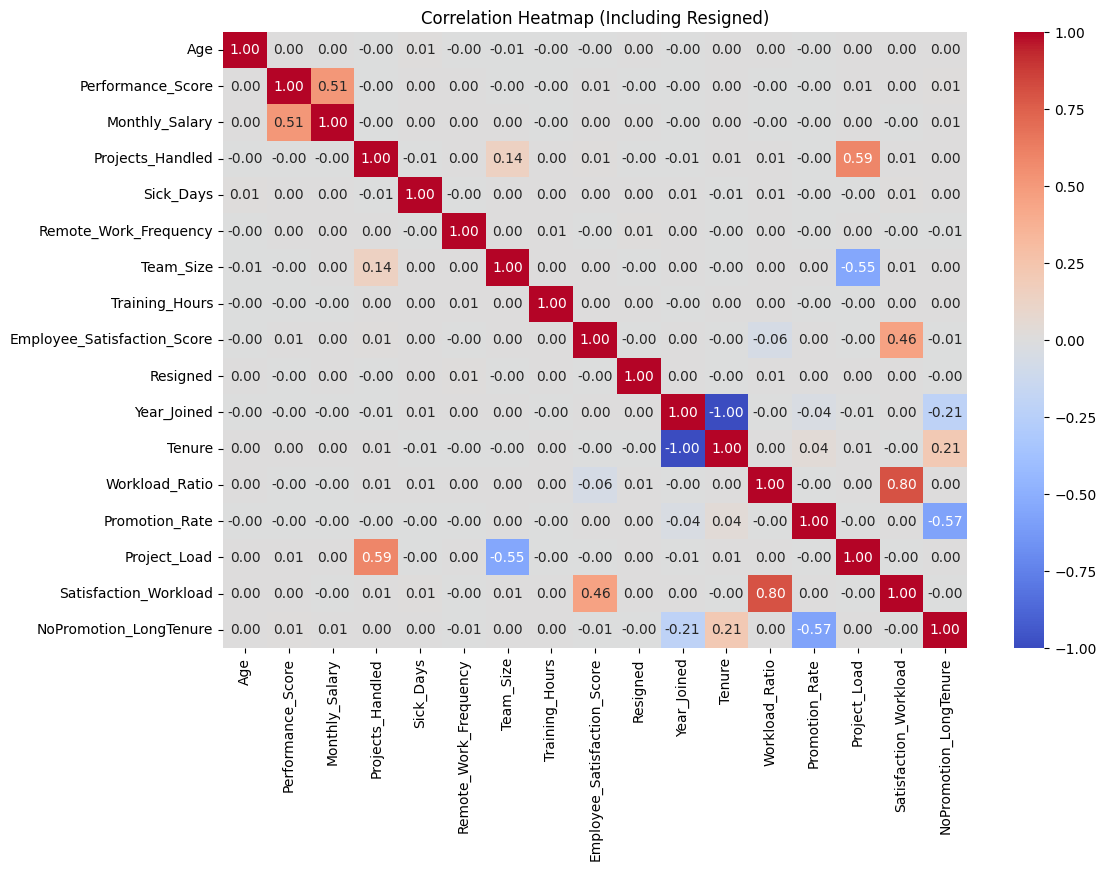

Resigned                       1.000000
Remote_Work_Frequency          0.009131
Workload_Ratio                 0.005498
Training_Hours                 0.004282
Satisfaction_Workload          0.002476
Age                            0.002122
Promotion_Rate                 0.001795
Sick_Days                      0.001630
Year_Joined                    0.001087
Monthly_Salary                 0.000831
Project_Load                   0.000069
Projects_Handled              -0.000920
Tenure                        -0.001087
Performance_Score             -0.001407
Team_Size                     -0.001788
NoPromotion_LongTenure        -0.002957
Employee_Satisfaction_Score   -0.003476
Name: Resigned, dtype: float64


In [17]:
def correlation_with_resigned(df, target="Resigned"):

    # Ensure Resigned is numeric (0/1)
    if df[target].dtype == "bool":
        df[target] = df[target].astype(int)

    num_df = df.select_dtypes(include=["int64", "float64", "int32"])

    # Compute correlation
    corr = num_df.corr()

    # Plot heatmap
    plt.figure(figsize=(12,8))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
    plt.title("Correlation Heatmap (Including Resigned)")
    plt.show()

    # Return correlations of features with target
    return corr[target].sort_values(ascending=False)

correlations = correlation_with_resigned(df, target="Resigned")
print(correlations)

In [18]:
from sklearn.preprocessing import StandardScaler
def scale_numeric_features(df, exclude_cols=None):
    
    if exclude_cols is None:
        exclude_cols = []
        
    num_cols = [col for col in df.select_dtypes(include=["int64", "float64", "int32"]).columns 
                if col not in exclude_cols]

    scaler = StandardScaler()
    df[num_cols] = scaler.fit_transform(df[num_cols])

    return df

df = scale_numeric_features(df, exclude_cols=["Resigned"])

df.head()

,Age,Performance_Score,Monthly_Salary,Projects_Handled,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Employee_Satisfaction_Score,Resigned,...,Job_Department_Specialist_Sales,Job_Department_Technician_Customer Support,Job_Department_Technician_Engineering,Job_Department_Technician_Finance,Job_Department_Technician_HR,Job_Department_Technician_IT,Job_Department_Technician_Legal,Job_Department_Technician_Marketing,Job_Department_Technician_Operations,Job_Department_Technician_Sales
0,1.245506,1.417473,0.252199,0.606997,-1.157162,-1.415439,0.604905,0.569717,-0.293126,0,...,False,False,False,False,False,False,False,False,False,False
1,-1.070575,1.417473,0.799083,0.745846,1.612034,1.413334,0.207270,0.396835,-1.090632,0,...,False,False,False,False,False,False,False,False,False,False
2,1.245506,0.003419,-0.404063,0.259876,-0.926395,-0.001052,-0.190366,-1.677748,0.180119,0,...,False,False,False,False,False,False,False,False,False,False
3,0.621946,-0.703608,-1.169702,-0.920338,1.150501,1.413334,-0.190366,-1.712325,-0.967939,0,...,False,False,False,False,False,False,False,False,False,False
4,-0.447015,-0.703608,-1.169702,-0.850914,1.381267,1.413334,0.803723,-1.401137,-1.502531,0,...,False,False,False,False,False,False,False,False,False,False


In [19]:
def convert_resigned_to_binary(df, target="Resigned", positive_values=None):
    
    if target not in df.columns:
        raise ValueError(f"Target column '{target}' not found in DataFrame.")
    
    # Default positive values
    if positive_values is None:
        positive_values = [True, "Yes", "yes", 1, "1"]
    
    # Convert to binary
    df[target] = df[target].apply(lambda x: 1 if x in positive_values else 0)
    return df

df = convert_resigned_to_binary(df)

# Check unique values
print(df["Resigned"].value_counts())

Resigned
0    70192
1     7765
Name: count, dtype: int64


In [20]:
from sklearn.model_selection import train_test_split
def split_train_test(df, target="Resigned", test_size=0.2, random_state=42):
    
    if target not in df.columns:
        raise ValueError(f"Target column '{target}' not found in DataFrame.")
    
    X = df.drop(columns=[target])
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )
    
    print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_train_test(df, target="Resigned")



Train shape: (62365, 102), Test shape: (15592, 102)


In [21]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
def train_xgb_recall_optimized(X_train, X_test, y_train, y_test, threshold=0.3, random_state=42):

     # Compute scale_pos_weight for imbalance
    neg, pos = np.bincount(y_train)
    scale_pos_weight = neg / pos

    # Initialize XGBoost
    model = XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=random_state,
        n_jobs=-1,
        scale_pos_weight=scale_pos_weight
    )

    # Train
    model.fit(X_train, y_train)

    # Predict probabilities
    y_proba = model.predict_proba(X_test)[:,1]
    y_pred = (y_proba >= threshold).astype(int)

    # Evaluation metrics
    print(f"Using threshold={threshold}")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print("Precision:", round(precision_score(y_test, y_pred), 4))
    print("Recall:", round(recall_score(y_test, y_pred), 4))
    print("F1-Score:", round(f1_score(y_test, y_pred), 4))
    print("ROC-AUC:", round(roc_auc_score(y_test, y_proba), 4))

    # Feature importance
    feature_importance = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    print("\nTop 10 Feature Importances:")
    print(feature_importance.head(10))

    return model

xgb_model = train_xgb_recall_optimized(X_train, X_test, y_train, y_test, threshold=0.3)



/home/zakn777/AI_ENV/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:03:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Using threshold=0.3
Accuracy: 0.3341
Precision: 0.1
Recall: 0.7109
F1-Score: 0.1754
ROC-AUC: 0.5098

Top 10 Feature Importances:
Job_Title_Engineer                       0.013486
Department_Finance                       0.013055
Department_HR                            0.012876
Job_Department_Consultant_Engineering    0.012427
Job_Title_Technician                     0.012425
Job_Department_Consultant_Sales          0.012419
Job_Department_Manager_Finance           0.012305
Job_Department_Analyst_Marketing         0.012116
Job_Title_Developer                      0.011999
Department_IT                            0.011847
dtype: float32
